In [112]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

from tqdm import tqdm
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

## Import data

In [113]:
# df_raw = pd.read_csv("wdbc.csv", header=None)
df_raw = pd.read_csv("./annthyroid.csv", header=None)

df_raw

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,0.750000,1,0,1,1,1,1,1,0,1,...,1,1,1,1,0.001132,0.080780,0.197324,0.300926,0.225000,1
1,0.239583,1,1,1,1,1,1,1,1,1,...,1,1,1,1,0.000472,0.164345,0.235786,0.537037,0.165625,1
2,0.479167,1,1,1,1,1,1,1,1,1,...,1,1,1,1,0.003585,0.130919,0.167224,0.527778,0.118750,1
3,0.656250,0,1,1,1,1,1,1,1,1,...,1,1,1,1,0.001698,0.091922,0.125418,0.337963,0.129688,1
4,0.229167,1,1,1,1,1,1,1,1,1,...,1,1,1,1,0.000472,0.142061,0.229097,0.337963,0.235938,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7085,0.604167,1,1,1,1,1,1,1,1,1,...,1,1,1,0,0.004717,0.113092,0.128763,0.379630,0.121875,1
7086,0.520833,1,1,1,1,1,1,1,1,1,...,1,1,1,1,0.200000,0.030641,0.005017,0.333333,0.005469,-1
7087,0.520833,1,1,1,1,1,1,1,1,1,...,1,1,1,0,0.001434,0.109192,0.147157,0.231481,0.206250,1
7088,0.354167,0,1,1,1,1,1,1,1,1,...,1,1,1,1,0.005283,0.109192,0.147157,0.333333,0.154688,1


In [114]:
df_raw[21].loc[df_raw[21] == -1] = 0
df_raw

C:\Users\Rongavilla\AppData\Local\Temp\ipykernel_19400\46608714.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw[21].loc[df_raw[21] == -1] = 0


,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,0.750000,1,0,1,1,1,1,1,0,1,...,1,1,1,1,0.001132,0.080780,0.197324,0.300926,0.225000,1
1,0.239583,1,1,1,1,1,1,1,1,1,...,1,1,1,1,0.000472,0.164345,0.235786,0.537037,0.165625,1
2,0.479167,1,1,1,1,1,1,1,1,1,...,1,1,1,1,0.003585,0.130919,0.167224,0.527778,0.118750,1
3,0.656250,0,1,1,1,1,1,1,1,1,...,1,1,1,1,0.001698,0.091922,0.125418,0.337963,0.129688,1
4,0.229167,1,1,1,1,1,1,1,1,1,...,1,1,1,1,0.000472,0.142061,0.229097,0.337963,0.235938,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7085,0.604167,1,1,1,1,1,1,1,1,1,...,1,1,1,0,0.004717,0.113092,0.128763,0.379630,0.121875,1
7086,0.520833,1,1,1,1,1,1,1,1,1,...,1,1,1,1,0.200000,0.030641,0.005017,0.333333,0.005469,0
7087,0.520833,1,1,1,1,1,1,1,1,1,...,1,1,1,0,0.001434,0.109192,0.147157,0.231481,0.206250,1
7088,0.354167,0,1,1,1,1,1,1,1,1,...,1,1,1,1,0.005283,0.109192,0.147157,0.333333,0.154688,1


In [115]:
y = pd.get_dummies(df_raw[21])
y = df_raw[21]

y

0       1
1       1
2       1
3       1
4       1
       ..
7085    1
7086    0
7087    1
7088    1
7089    1
Name: 21, Length: 7090, dtype: int64

In [116]:
x = df_raw.iloc[:,:-1]
x = (x - x.min()) / (x.max() - x.min())

x.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,0.750000,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.001132,0.080780,0.197324,0.300926,0.225000
1,0.239583,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.000472,0.164345,0.235786,0.537037,0.165625
2,0.479167,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.003585,0.130919,0.167224,0.527778,0.118750
3,0.656250,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.001698,0.091922,0.125418,0.337963,0.129688
4,0.229167,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.000472,0.142061,0.229097,0.337963,0.235938


## Train test split

In [117]:
x_raw, x_test, y_raw, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [119]:
# zero_count = y_raw[0][y_raw[0] == 1].count()
# one_count = y_raw[1][y_raw[1] == 1].count()
# zero_count = y_raw[y_raw[0] == 0].count()
# one_count = y_raw[0][y_raw[0] == 1].count()

zero_count = 0
one_count = 0
for i in y_raw:
    if i == 0:
        zero_count += 1
    else:
        one_count += 1

print('The number of 0 in the training set is: {}'.format(zero_count))
print('The number of 1 in the training set is: {}'.format(one_count))

to_generate = one_count-zero_count
print('Goal: Generate {} datasets for 0.'.format(to_generate))

# to_generate = 4816

The number of 0 in the training set is: 428
The number of 1 in the training set is: 5244
Goal: Generate 4816 datasets for 0.


In [123]:
x_missing = x_raw[y_raw.values == 0]
x_missing

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
5398,0.750000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.028302,0.108635,0.130435,0.305556,0.146875
2900,0.708333,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.020925,0.069638,0.143813,0.402778,0.126563
5002,0.489583,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.137736,0.125348,0.142140,0.439815,0.118750
2827,0.281250,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.194340,0.113092,0.105351,0.458333,0.084375
4652,0.843750,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.011698,0.080780,0.162207,0.337963,0.168750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3453,0.510417,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.014340,0.091922,0.210702,0.421296,0.181250
4611,0.791667,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.266038,0.000000,0.001672,0.402778,0.001563
728,0.750000,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.018868,0.052925,0.137124,0.564815,0.090625
3049,0.635417,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,0.0,0.020755,0.052925,0.165552,0.287037,0.196875


## Variational Autoencoder

In [124]:
class VariationalAutoencoder(nn.Module):
    def __init__(self, num_features=8, num_dim=21):
        super(VariationalAutoencoder, self).__init__()
        
        self.num_features = num_features
        self.num_dim = num_dim
        
        self.encoder_layer_1 = nn.Linear(in_features=self.num_dim, out_features=14)
        self.encoder_layer_2 = nn.Linear(in_features=14, out_features=(self.num_features * 2))
        
        self.decoder_layer_1 = nn.Linear(in_features=self.num_features, out_features=14)
        self.decoder_layer_2 = nn.Linear(in_features=14, out_features=self.num_dim)
        
        self.relu = nn.ReLU() # hidden layers
        self.sigmoid = nn.Sigmoid() # output layer
        
    def reparameterize(self, mu, log_var):
        """
        :param mu: mean from the encoder's latent space
        :param log_var: log variance from the encoder's latent space
        """
        std = torch.exp(0.5*log_var) # standard deviation
        eps = torch.randn_like(std)  # `randn_like` as we need the same size
        sample = mu + (eps * std)    # sampling as if coming from the input space
        
        return sample
    
    def encode(self, x):
        # encoding
        #x = F.relu(self.encoder_layer_1(x))
        x = self.encoder_layer_1(x)
        x = self.relu(x)
        x = self.encoder_layer_2(x).view(-1, 2, self.num_features)
        
        # get `mu` and `log_var`
        mu = x[:, 0, :] # the first feature values as mean
        log_var = x[:, 1, :] # the other feature values as variance
        
        # get the latent vector through reparameterization
        z = self.reparameterize(mu, log_var)
        
        return z, mu, log_var
    
    def decode(self, z, mu, log_var):
        # decoding
        #x = F.relu(self.decoder_layer_1(z))
        x = self.decoder_layer_1(z)
        x = self.relu(x)
        
        #reconstruction = torch.sigmoid(self.decoder_layer_2(x))
        reconstruction = self.decoder_layer_2(x)
        reconstruction = self.sigmoid(reconstruction)
        
        return reconstruction, mu, log_var
    
    # Utility function to generate new data based on:
    # mu: The average that you want to have (should be the same size as num_features)
    # log_var: The variance that you want to have (should be the same size as num_features)
    def sample(self, mu, log_var):
        z = self.reparameterize(mu, log_var)
        reconstruction, mu, log_var = self.decode(z, mu, log_var)
        
        return reconstruction
        
    
    def forward(self, x):
        
        z, mu, log_var = self.encode(x)
        reconstruction, mu, log_var = self.decode(z, mu, log_var)
        
        return reconstruction, mu, log_var

In [125]:
# Custom dataset to treat how the model picks an x, y combination from the dataset
class AutoencoderDataset(Dataset):
    def __init__(self, x):
        self.x = x
        
    def __len__(self):
        return len(self.x)
    
    # Requires you to return data as a pair of _x, _y
    def __getitem__(self, index):
        return self.x[index], self.x[index]

In [126]:
# The final loss is a combination of the reconstruction loss (first argument) and the loss from an assumed distribution (i.e. Normal / Gaussian distribution)
def final_loss(bce_loss, mu, logvar):
    """
    This function will add the reconstruction loss (BCELoss) and the 
    KL-Divergence.
    KL-Divergence = 0.5 * sum(1 + log(sigma^2) - mu^2 - sigma^2)
    :param bce_loss: recontruction loss
    :param mu: the mean from the latent vector
    :param logvar: log variance from the latent vector
    """
    BCE = bce_loss 
    KLD = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
    return BCE + KLD

In [127]:
num_features = 8
model = VariationalAutoencoder(num_features=num_features)

In [128]:
learning_rate = 0.0001
loss_fn = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
batch_size = 5

In [129]:
def train_fn(loader, model, optimizer, loss_fn, batch_size):
    loop = tqdm(loader)
    
    count = 0
    ave_loss = 0.00
    
    # Loop per batch
    for batch_idx, (data, targets) in enumerate(loop):
        reconstruction, mu, logvar = model.forward(data)
        
        loss = loss_fn(reconstruction, targets)
        
        loss = final_loss(loss, mu, logvar)
        
        optimizer.zero_grad()
        
        loss.backward()
        
        optimizer.step()
        
        loop.set_postfix(loss=loss.item())
        
        ave_loss += loss.item()
        count += 1
        
    ave_loss = ave_loss / count
    
    return ave_loss

In [130]:
x_missing = torch.Tensor(np.array(x_missing))

# use Dataloader for Autoencoder 
custom_dataset = AutoencoderDataset(x_missing)

train_loader = DataLoader(
    custom_dataset,
    batch_size=batch_size,
    shuffle=False,
    drop_last=False
)

In [131]:
epochs = 100
losses = []

for epoch in range(epochs):
    print("Epoch: {}".format(epoch))
    
    ave_loss = train_fn(
        train_loader,
        model,
        optimizer,
        loss_fn,
        batch_size
    )
    
    losses.append(ave_loss)
    
    print("Ave Loss: {}".format(ave_loss))
    
    state = { 'state_dict': model.state_dict() }

    torch.save(state, "variational-autoencoder.pth")

Epoch: 0


100%|██████████| 86/86 [00:00<00:00, 288.81it/s, loss=1.43]


Ave Loss: 2.6269277639167252
Epoch: 1


100%|██████████| 86/86 [00:00<00:00, 378.79it/s, loss=1.04]


Ave Loss: 1.6148498501888542
Epoch: 2


100%|██████████| 86/86 [00:00<00:00, 328.44it/s, loss=0.825]


Ave Loss: 1.1043151111103768
Epoch: 3


100%|██████████| 86/86 [00:00<00:00, 333.52it/s, loss=0.789]


Ave Loss: 0.8783505856990814
Epoch: 4


100%|██████████| 86/86 [00:00<00:00, 267.27it/s, loss=0.742]


Ave Loss: 0.7878421080666919
Epoch: 5


100%|██████████| 86/86 [00:00<00:00, 282.75it/s, loss=0.711]


Ave Loss: 0.7479311359483142
Epoch: 6


100%|██████████| 86/86 [00:00<00:00, 291.92it/s, loss=0.704]


Ave Loss: 0.723216456036235
Epoch: 7


100%|██████████| 86/86 [00:00<00:00, 312.33it/s, loss=0.685]


Ave Loss: 0.7074790021707845
Epoch: 8


100%|██████████| 86/86 [00:00<00:00, 314.06it/s, loss=0.669]


Ave Loss: 0.6919697467670884
Epoch: 9


100%|██████████| 86/86 [00:00<00:00, 325.96it/s, loss=0.664]


Ave Loss: 0.6759195161420245
Epoch: 10


100%|██████████| 86/86 [00:00<00:00, 390.10it/s, loss=0.656]


Ave Loss: 0.661689241958219
Epoch: 11


100%|██████████| 86/86 [00:00<00:00, 413.47it/s, loss=0.63] 


Ave Loss: 0.6480640207612237
Epoch: 12


100%|██████████| 86/86 [00:00<00:00, 382.29it/s, loss=0.63] 


Ave Loss: 0.6331979611585307
Epoch: 13


100%|██████████| 86/86 [00:00<00:00, 294.37it/s, loss=0.621]


Ave Loss: 0.6184400437876235
Epoch: 14


100%|██████████| 86/86 [00:00<00:00, 358.38it/s, loss=0.599]


Ave Loss: 0.6036190716333167
Epoch: 15


100%|██████████| 86/86 [00:00<00:00, 397.74it/s, loss=0.591]


Ave Loss: 0.5893984229065651
Epoch: 16


100%|██████████| 86/86 [00:00<00:00, 373.55it/s, loss=0.587]


Ave Loss: 0.5739865601062775
Epoch: 17


100%|██████████| 86/86 [00:00<00:00, 392.73it/s, loss=0.571]


Ave Loss: 0.5611646404100019
Epoch: 18


100%|██████████| 86/86 [00:00<00:00, 391.88it/s, loss=0.506]


Ave Loss: 0.5415033413920292
Epoch: 19


100%|██████████| 86/86 [00:00<00:00, 244.08it/s, loss=0.499]


Ave Loss: 0.528301905407462
Epoch: 20


100%|██████████| 86/86 [00:00<00:00, 258.12it/s, loss=0.559]


Ave Loss: 0.5179466851228891
Epoch: 21


100%|██████████| 86/86 [00:00<00:00, 296.60it/s, loss=0.526]


Ave Loss: 0.5078421051419059
Epoch: 22


100%|██████████| 86/86 [00:00<00:00, 298.31it/s, loss=0.493]


Ave Loss: 0.48710780261560926
Epoch: 23


100%|██████████| 86/86 [00:00<00:00, 266.50it/s, loss=0.495]


Ave Loss: 0.473893532226252
Epoch: 24


100%|██████████| 86/86 [00:00<00:00, 305.72it/s, loss=0.444]


Ave Loss: 0.46381485496842584
Epoch: 25


100%|██████████| 86/86 [00:00<00:00, 316.38it/s, loss=0.483]


Ave Loss: 0.44680596853411475
Epoch: 26


100%|██████████| 86/86 [00:00<00:00, 313.86it/s, loss=0.431]


Ave Loss: 0.43886584771233933
Epoch: 27


100%|██████████| 86/86 [00:00<00:00, 326.84it/s, loss=0.428]


Ave Loss: 0.42832210694634637
Epoch: 28


100%|██████████| 86/86 [00:00<00:00, 317.67it/s, loss=0.449]


Ave Loss: 0.4153942711824595
Epoch: 29


100%|██████████| 86/86 [00:00<00:00, 318.59it/s, loss=0.437]


Ave Loss: 0.4037630266921465
Epoch: 30


100%|██████████| 86/86 [00:00<00:00, 396.57it/s, loss=0.476]


Ave Loss: 0.3946594252835873
Epoch: 31


100%|██████████| 86/86 [00:00<00:00, 392.27it/s, loss=0.384]


Ave Loss: 0.38303351402282715
Epoch: 32


100%|██████████| 86/86 [00:00<00:00, 406.54it/s, loss=0.379]


Ave Loss: 0.3733809881432112
Epoch: 33


100%|██████████| 86/86 [00:00<00:00, 405.65it/s, loss=0.379]


Ave Loss: 0.3647572491751161
Epoch: 34


100%|██████████| 86/86 [00:00<00:00, 407.05it/s, loss=0.39] 


Ave Loss: 0.3622505266306012
Epoch: 35


100%|██████████| 86/86 [00:00<00:00, 399.80it/s, loss=0.34] 


Ave Loss: 0.35398068331008736
Epoch: 36


100%|██████████| 86/86 [00:00<00:00, 312.56it/s, loss=0.388]


Ave Loss: 0.34320628469766573
Epoch: 37


100%|██████████| 86/86 [00:00<00:00, 302.67it/s, loss=0.342]


Ave Loss: 0.3324968211872633
Epoch: 38


100%|██████████| 86/86 [00:00<00:00, 288.90it/s, loss=0.37] 


Ave Loss: 0.32932666152022605
Epoch: 39


100%|██████████| 86/86 [00:00<00:00, 323.20it/s, loss=0.339]


Ave Loss: 0.32558005216509794
Epoch: 40


100%|██████████| 86/86 [00:00<00:00, 315.88it/s, loss=0.322]


Ave Loss: 0.31214074929093205
Epoch: 41


100%|██████████| 86/86 [00:00<00:00, 291.19it/s, loss=0.344]


Ave Loss: 0.3125605037392572
Epoch: 42


100%|██████████| 86/86 [00:00<00:00, 307.96it/s, loss=0.33] 


Ave Loss: 0.30446883256352225
Epoch: 43


100%|██████████| 86/86 [00:00<00:00, 327.74it/s, loss=0.349]


Ave Loss: 0.30050660288611125
Epoch: 44


100%|██████████| 86/86 [00:00<00:00, 289.47it/s, loss=0.349]


Ave Loss: 0.29446317636689473
Epoch: 45


100%|██████████| 86/86 [00:00<00:00, 346.53it/s, loss=0.296]


Ave Loss: 0.2937567161266194
Epoch: 46


100%|██████████| 86/86 [00:00<00:00, 354.41it/s, loss=0.326]


Ave Loss: 0.28439775421175845
Epoch: 47


100%|██████████| 86/86 [00:00<00:00, 334.89it/s, loss=0.318]


Ave Loss: 0.2819635850745578
Epoch: 48


100%|██████████| 86/86 [00:00<00:00, 374.65it/s, loss=0.294]


Ave Loss: 0.2803960378433383
Epoch: 49


100%|██████████| 86/86 [00:00<00:00, 397.65it/s, loss=0.305]


Ave Loss: 0.2761813792031865
Epoch: 50


100%|██████████| 86/86 [00:00<00:00, 315.58it/s, loss=0.291]


Ave Loss: 0.27428965686365614
Epoch: 51


100%|██████████| 86/86 [00:00<00:00, 393.07it/s, loss=0.344]


Ave Loss: 0.2703982395834701
Epoch: 52


100%|██████████| 86/86 [00:00<00:00, 388.62it/s, loss=0.308]


Ave Loss: 0.2654155530901842
Epoch: 53


100%|██████████| 86/86 [00:00<00:00, 397.80it/s, loss=0.299]


Ave Loss: 0.2640221482792566
Epoch: 54


100%|██████████| 86/86 [00:00<00:00, 364.42it/s, loss=0.329]


Ave Loss: 0.2618794189982636
Epoch: 55


100%|██████████| 86/86 [00:00<00:00, 383.89it/s, loss=0.301]


Ave Loss: 0.25904357034799663
Epoch: 56


100%|██████████| 86/86 [00:00<00:00, 365.11it/s, loss=0.279]


Ave Loss: 0.26023500239433245
Epoch: 57


100%|██████████| 86/86 [00:00<00:00, 389.68it/s, loss=0.275]


Ave Loss: 0.25476854658404063
Epoch: 58


100%|██████████| 86/86 [00:00<00:00, 432.46it/s, loss=0.267]


Ave Loss: 0.25442138002362363
Epoch: 59


100%|██████████| 86/86 [00:00<00:00, 412.18it/s, loss=0.277]


Ave Loss: 0.2517143572832263
Epoch: 60


100%|██████████| 86/86 [00:00<00:00, 398.34it/s, loss=0.284]


Ave Loss: 0.25008582219828007
Epoch: 61


100%|██████████| 86/86 [00:00<00:00, 417.80it/s, loss=0.281]


Ave Loss: 0.24851469089125477
Epoch: 62


100%|██████████| 86/86 [00:00<00:00, 404.68it/s, loss=0.282]


Ave Loss: 0.24826520421477252
Epoch: 63


100%|██████████| 86/86 [00:00<00:00, 374.17it/s, loss=0.279]


Ave Loss: 0.24653039162242135
Epoch: 64


100%|██████████| 86/86 [00:00<00:00, 386.43it/s, loss=0.261]


Ave Loss: 0.24536157676646875
Epoch: 65


100%|██████████| 86/86 [00:00<00:00, 403.08it/s, loss=0.276]


Ave Loss: 0.24281140953995461
Epoch: 66


100%|██████████| 86/86 [00:00<00:00, 407.58it/s, loss=0.279]


Ave Loss: 0.2427527327523675
Epoch: 67


100%|██████████| 86/86 [00:00<00:00, 412.52it/s, loss=0.291]


Ave Loss: 0.23927506146042846
Epoch: 68


100%|██████████| 86/86 [00:00<00:00, 435.53it/s, loss=0.286]


Ave Loss: 0.23881346333858577
Epoch: 69


100%|██████████| 86/86 [00:00<00:00, 369.22it/s, loss=0.286]


Ave Loss: 0.23969624572715095
Epoch: 70


100%|██████████| 86/86 [00:00<00:00, 374.93it/s, loss=0.275]


Ave Loss: 0.23767794131539588
Epoch: 71


100%|██████████| 86/86 [00:00<00:00, 407.47it/s, loss=0.26] 


Ave Loss: 0.23835376320883286
Epoch: 72


100%|██████████| 86/86 [00:00<00:00, 407.34it/s, loss=0.261]


Ave Loss: 0.23717444892539535
Epoch: 73


100%|██████████| 86/86 [00:00<00:00, 418.58it/s, loss=0.278]


Ave Loss: 0.23672672915597295
Epoch: 74


100%|██████████| 86/86 [00:00<00:00, 326.62it/s, loss=0.321]


Ave Loss: 0.23637773858946423
Epoch: 75


100%|██████████| 86/86 [00:00<00:00, 350.88it/s, loss=0.263]


Ave Loss: 0.23456762696421424
Epoch: 76


100%|██████████| 86/86 [00:00<00:00, 375.65it/s, loss=0.277]


Ave Loss: 0.23390690237283707
Epoch: 77


100%|██████████| 86/86 [00:00<00:00, 384.84it/s, loss=0.252]


Ave Loss: 0.23365339896706647
Epoch: 78


100%|██████████| 86/86 [00:00<00:00, 374.78it/s, loss=0.249]


Ave Loss: 0.2316414765840353
Epoch: 79


100%|██████████| 86/86 [00:00<00:00, 416.10it/s, loss=0.304]


Ave Loss: 0.2334536572181901
Epoch: 80


100%|██████████| 86/86 [00:00<00:00, 357.29it/s, loss=0.262]


Ave Loss: 0.23239176633746125
Epoch: 81


100%|██████████| 86/86 [00:00<00:00, 385.98it/s, loss=0.256]


Ave Loss: 0.23143265846856806
Epoch: 82


100%|██████████| 86/86 [00:00<00:00, 414.27it/s, loss=0.26] 


Ave Loss: 0.23154796209446218
Epoch: 83


100%|██████████| 86/86 [00:00<00:00, 342.37it/s, loss=0.293]


Ave Loss: 0.23141635434572086
Epoch: 84


100%|██████████| 86/86 [00:00<00:00, 331.95it/s, loss=0.257]


Ave Loss: 0.2298275623903718
Epoch: 85


100%|██████████| 86/86 [00:00<00:00, 330.59it/s, loss=0.257]


Ave Loss: 0.2295279400639756
Epoch: 86


100%|██████████| 86/86 [00:00<00:00, 387.87it/s, loss=0.264]


Ave Loss: 0.22996666109146074
Epoch: 87


100%|██████████| 86/86 [00:00<00:00, 391.39it/s, loss=0.264]


Ave Loss: 0.22811883150838141
Epoch: 88


100%|██████████| 86/86 [00:00<00:00, 317.11it/s, loss=0.265]


Ave Loss: 0.22884009137403133
Epoch: 89


100%|██████████| 86/86 [00:00<00:00, 399.56it/s, loss=0.258]


Ave Loss: 0.2294096503146859
Epoch: 90


100%|██████████| 86/86 [00:00<00:00, 387.77it/s, loss=0.263]


Ave Loss: 0.2298694280690925
Epoch: 91


100%|██████████| 86/86 [00:00<00:00, 335.42it/s, loss=0.261]


Ave Loss: 0.2293376153291658
Epoch: 92


100%|██████████| 86/86 [00:00<00:00, 318.36it/s, loss=0.266]


Ave Loss: 0.2274788410164589
Epoch: 93


100%|██████████| 86/86 [00:00<00:00, 397.45it/s, loss=0.259]


Ave Loss: 0.2276319461159928
Epoch: 94


100%|██████████| 86/86 [00:00<00:00, 424.92it/s, loss=0.264]


Ave Loss: 0.22697191148303275
Epoch: 95


100%|██████████| 86/86 [00:00<00:00, 405.37it/s, loss=0.27] 


Ave Loss: 0.22720407313385674
Epoch: 96


100%|██████████| 86/86 [00:00<00:00, 435.83it/s, loss=0.257]


Ave Loss: 0.2269589911366618
Epoch: 97


100%|██████████| 86/86 [00:00<00:00, 381.24it/s, loss=0.271]


Ave Loss: 0.22696417691402657
Epoch: 98


100%|██████████| 86/86 [00:00<00:00, 374.51it/s, loss=0.276]


Ave Loss: 0.22585788698390472
Epoch: 99


100%|██████████| 86/86 [00:00<00:00, 378.54it/s, loss=0.253]

Ave Loss: 0.22575159232283748


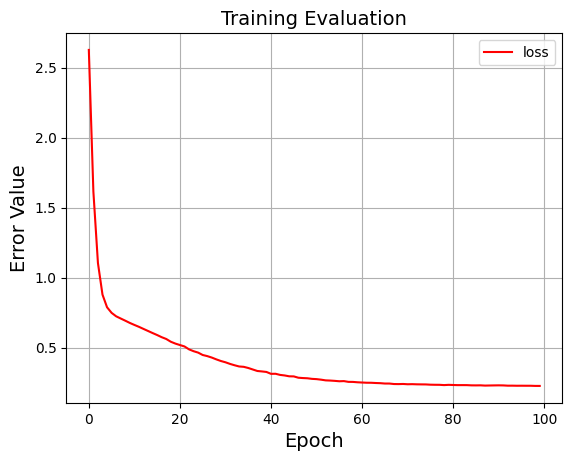

In [132]:
plt.plot(losses, label='loss', color='red')
plt.title('Training Evaluation', fontsize=14)
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Error Value', fontsize=14)
plt.grid(True)
plt.legend()
plt.show()

In [133]:
# Create a vector of zero tensors representing 0 average per num_feature (right in the middle of the dist)
sampled_mu = torch.Tensor([np.zeros(num_features)])

# Create a vector of zero tensors representing 0 standard deviations away from the mean to create variations
# Change this is you want to sample away from the mean to create "off-quality" data
sampled_logvar = torch.Tensor([np.zeros(num_features)])

sampled_logvar.shape

torch.Size([1, 8])

In [134]:
reconstruction = model.sample(sampled_mu, sampled_logvar)
reconstruction

tensor([[0.5288, 0.7781, 0.9739, 0.9784, 0.9970, 0.9393, 0.9953, 0.9866, 0.9855,
         0.8883, 0.9426, 0.9882, 0.9908, 0.9778, 0.9967, 0.9903, 0.0587, 0.0915,
         0.1143, 0.3514, 0.0875]], grad_fn=<SigmoidBackward0>)

In [135]:
x_fab = x_raw
x_fab

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
2707,0.510417,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.004340,0.108635,0.209030,0.444444,0.173438
5398,0.750000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.028302,0.108635,0.130435,0.305556,0.146875
4281,0.614583,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.004377,0.109192,0.186104,0.365741,0.180875
6768,0.656250,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,1.0,1.0,1.0,1.0,1.0,0.001057,0.097493,0.147157,0.287037,0.175000
2836,0.385417,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,1.0,1.0,1.0,1.0,1.0,0.003566,0.111978,0.182575,0.379630,0.171984
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
905,0.572917,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.000377,0.111978,0.220736,0.398148,0.200000
5192,0.739583,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,0.0,0.002642,0.109192,0.177258,0.361111,0.175000
3980,0.385417,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.002830,0.175487,0.224080,0.342593,0.229688
235,0.500000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.000189,0.013928,0.050167,0.162037,0.090625


In [136]:
added_m_data = []

for i in range(to_generate):
    reconstruction = model.sample(sampled_mu, sampled_logvar)
    reconstruction = added_m_data.append(reconstruction[0].detach().cpu().numpy())

col_name = [x for x in range(0, 21)]
x_added = pd.DataFrame(added_m_data, columns=col_name)
x_added

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,0.570820,0.756908,0.970703,0.966375,0.986433,0.950032,0.983663,0.982346,0.966417,0.807102,...,0.981075,0.991234,0.960881,0.988377,0.960505,0.092287,0.114152,0.168468,0.409107,0.143744
1,0.535825,0.716823,0.978748,0.972951,0.996342,0.969727,0.995447,0.991241,0.988026,0.855615,...,0.980910,0.994410,0.968000,0.988496,0.976164,0.056008,0.071097,0.116925,0.378149,0.112388
2,0.537340,0.807377,0.976980,0.992528,0.996526,0.981605,0.995618,0.991381,0.982453,0.877304,...,0.985793,0.997892,0.977843,0.994419,0.980125,0.058663,0.051483,0.101680,0.373908,0.107997
3,0.560116,0.772653,0.971443,0.995614,0.993621,0.976368,0.997639,0.995676,0.990734,0.875341,...,0.972225,0.998109,0.968602,0.991526,0.978826,0.084490,0.064109,0.116397,0.364355,0.101338
4,0.582208,0.878762,0.987820,0.987775,0.996654,0.972727,0.996863,0.993521,0.988827,0.916892,...,0.993949,0.996282,0.983202,0.998567,0.995130,0.059962,0.052580,0.108792,0.358121,0.064819
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4811,0.523773,0.846847,0.979460,0.989623,0.997662,0.949566,0.995882,0.990173,0.986897,0.891207,...,0.994618,0.996475,0.982644,0.998834,0.993999,0.069935,0.077047,0.111534,0.378788,0.069410
4812,0.557456,0.743915,0.937826,0.965978,0.988429,0.941798,0.983637,0.975114,0.965385,0.817158,...,0.958344,0.982414,0.947885,0.976669,0.960906,0.073398,0.080276,0.164737,0.393641,0.182968
4813,0.577125,0.796695,0.986075,0.975226,0.997112,0.948879,0.996345,0.986985,0.991717,0.865844,...,0.986945,0.988619,0.980466,0.994478,0.989071,0.048237,0.063770,0.101559,0.368176,0.081754
4814,0.580795,0.759357,0.977377,0.944699,0.989590,0.952826,0.980197,0.986556,0.975401,0.798458,...,0.984730,0.986013,0.977325,0.987388,0.953415,0.052079,0.097728,0.134255,0.399315,0.131385


In [137]:

y_targets = [[0] for x in range(to_generate)]
y_added = pd.DataFrame(y_targets)

y_added

,0
0,0
1,0
2,0
3,0
4,0
...,...
4811,0
4812,0
4813,0
4814,0


In [138]:
x_fab = pd.concat([x_fab, x_added])
x_fab

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
2707,0.510417,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.004340,0.108635,0.209030,0.444444,0.173438
5398,0.750000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.028302,0.108635,0.130435,0.305556,0.146875
4281,0.614583,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.004377,0.109192,0.186104,0.365741,0.180875
6768,0.656250,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.001057,0.097493,0.147157,0.287037,0.175000
2836,0.385417,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.003566,0.111978,0.182575,0.379630,0.171984
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4811,0.523773,0.846847,0.979460,0.989623,0.997662,0.949566,0.995882,0.990173,0.986897,0.891207,...,0.994618,0.996475,0.982644,0.998834,0.993999,0.069935,0.077047,0.111534,0.378788,0.069410
4812,0.557456,0.743915,0.937826,0.965978,0.988429,0.941798,0.983637,0.975114,0.965385,0.817158,...,0.958344,0.982414,0.947885,0.976669,0.960906,0.073398,0.080276,0.164737,0.393641,0.182968
4813,0.577125,0.796695,0.986075,0.975226,0.997112,0.948879,0.996345,0.986985,0.991717,0.865844,...,0.986945,0.988619,0.980466,0.994478,0.989071,0.048237,0.063770,0.101559,0.368176,0.081754
4814,0.580795,0.759357,0.977377,0.944699,0.989590,0.952826,0.980197,0.986556,0.975401,0.798458,...,0.984730,0.986013,0.977325,0.987388,0.953415,0.052079,0.097728,0.134255,0.399315,0.131385


In [139]:
y_fab = pd.concat([y_raw, y_added])
y_fab

,0
2707,1
5398,0
4281,1
6768,1
2836,1
...,...
4811,0
4812,0
4813,0
4814,0


In [140]:
x_raw = torch.Tensor(x_raw.values)
x_fab = torch.Tensor(x_fab.values)
x_test = torch.Tensor(x_test.values)

y_raw = torch.Tensor(y_raw.values)
y_fab = torch.Tensor(y_fab.values)

## Neural Network

In [141]:
class NeuralNetwork(nn.Module):
    def __init__(self, in_dim, out_dim):
        super().__init__()
        self.in_dim = in_dim
        self.out_dim = out_dim
        
        self.hidden_layer_1 = nn.Linear(self.in_dim, 10)
        self.hidden_layer_2 = nn.Linear(10, 2)
        self.output_layer = nn.Linear(2, self.out_dim)
        self.activation = nn.Sigmoid()
        
    def forward(self, x):
        x = self.hidden_layer_1(x)
        x = self.activation(x)
        
        x = self.hidden_layer_2(x)
        x = self.activation(x)
        
        y = self.output_layer(x)
        y = self.activation(y)
        
        return y

In [142]:
model = NeuralNetwork(21, 1)

# Test structure of model
predictions = model.forward(x_fab)

predictions.shape

torch.Size([10488, 1])

In [143]:
learning_rate = 0.001
loss_fn = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
batch_size = 5

In [144]:
# Custom dataset to treat how the model picks an x, y combination from the dataset
class MyCustomDataset(Dataset):
    def __init__(self, x, y):
        self.x = x
        self.y = y
        
    def __len__(self):
        return len(self.x)
    
    # Requires you to return data as a pair of _x, _y
    def __getitem__(self, index):
        return self.x[index], self.y[index]

In [145]:
def train_nn(loader, model, optimizer, loss_fn, batch_size):
    loop = tqdm(loader)
    
    count = 0
    ave_loss = 0.00
    
    # Loop per batch
    for batch_idx, (data, targets) in enumerate(loop):
        predictions = model.forward(data)
        
        loss = loss_fn(predictions, targets)
        
        optimizer.zero_grad()
        
        loss.backward()
        
        optimizer.step()
        
        loop.set_postfix(loss=loss.item())
        
        ave_loss += loss.item()
        count += 1
        
    ave_loss = ave_loss / count
    
    return ave_loss

In [146]:
custom_dataset = MyCustomDataset(x=x_fab, y=y_fab)

train_loader = DataLoader(
    custom_dataset,
    batch_size=batch_size,
    shuffle=False,
    drop_last=False
)

In [147]:
epochs = 100
losses = []

for epoch in range(epochs):
    print("Epoch: {}".format(epoch))
    
    ave_loss = train_nn(
        train_loader,
        model,
        optimizer,
        loss_fn,
        batch_size
    )
    
    losses.append(ave_loss)
    
    print("Ave Loss: {}".format(ave_loss))
    
    state = { 'state_dict': model.state_dict() }

    # acc: 0.90832, f1: 0.78
    # torch.save(state, "annthyroid_model.pth")
    
    torch.save(state, "annthyroid_model2.pth")
    

Epoch: 0


100%|██████████| 2098/2098 [00:04<00:00, 431.00it/s, loss=0.0667]


Ave Loss: 0.14777974983956044
Epoch: 1


100%|██████████| 2098/2098 [00:05<00:00, 400.99it/s, loss=0.0578]


Ave Loss: 0.1945961326328741
Epoch: 2


100%|██████████| 2098/2098 [00:04<00:00, 427.33it/s, loss=0.0489]


Ave Loss: 0.18429055214070275
Epoch: 3


100%|██████████| 2098/2098 [00:04<00:00, 462.40it/s, loss=0.0407]


Ave Loss: 0.1695900744189454
Epoch: 4


100%|██████████| 2098/2098 [00:03<00:00, 536.89it/s, loss=0.0333]


Ave Loss: 0.14988278766678517
Epoch: 5


100%|██████████| 2098/2098 [00:03<00:00, 553.67it/s, loss=0.0263]


Ave Loss: 0.1283351776293977
Epoch: 6


100%|██████████| 2098/2098 [00:03<00:00, 548.95it/s, loss=0.0201]


Ave Loss: 0.10783171712521204
Epoch: 7


100%|██████████| 2098/2098 [00:03<00:00, 546.10it/s, loss=0.0146] 


Ave Loss: 0.08799099808073184
Epoch: 8


100%|██████████| 2098/2098 [00:03<00:00, 549.21it/s, loss=0.01]   


Ave Loss: 0.06764238508301898
Epoch: 9


100%|██████████| 2098/2098 [00:03<00:00, 551.91it/s, loss=0.00692]


Ave Loss: 0.05303685761743125
Epoch: 10


100%|██████████| 2098/2098 [00:03<00:00, 604.16it/s, loss=0.00501]


Ave Loss: 0.04431428552828942
Epoch: 11


100%|██████████| 2098/2098 [00:04<00:00, 503.26it/s, loss=0.00381]


Ave Loss: 0.03876726153632715
Epoch: 12


100%|██████████| 2098/2098 [00:04<00:00, 518.07it/s, loss=0.00301]


Ave Loss: 0.03525439980028115
Epoch: 13


100%|██████████| 2098/2098 [00:03<00:00, 554.53it/s, loss=0.00247]


Ave Loss: 0.03304114119701081
Epoch: 14


100%|██████████| 2098/2098 [00:03<00:00, 549.38it/s, loss=0.00208]


Ave Loss: 0.031398043155400936
Epoch: 15


100%|██████████| 2098/2098 [00:03<00:00, 524.55it/s, loss=0.00178] 


Ave Loss: 0.030069915760882037
Epoch: 16


100%|██████████| 2098/2098 [00:04<00:00, 507.14it/s, loss=0.00154] 


Ave Loss: 0.028943165108119603
Epoch: 17


100%|██████████| 2098/2098 [00:03<00:00, 534.12it/s, loss=0.00136] 


Ave Loss: 0.027960108141650092
Epoch: 18


100%|██████████| 2098/2098 [00:03<00:00, 548.94it/s, loss=0.00122] 


Ave Loss: 0.02703694445848464
Epoch: 19


100%|██████████| 2098/2098 [00:04<00:00, 433.13it/s, loss=0.00109] 


Ave Loss: 0.026141970539331264
Epoch: 20


100%|██████████| 2098/2098 [00:05<00:00, 403.76it/s, loss=0.000995]


Ave Loss: 0.025327592271938787
Epoch: 21


100%|██████████| 2098/2098 [00:05<00:00, 408.85it/s, loss=0.000917]


Ave Loss: 0.0246088759991901
Epoch: 22


100%|██████████| 2098/2098 [00:04<00:00, 419.64it/s, loss=0.000853]


Ave Loss: 0.02396530707488729
Epoch: 23


100%|██████████| 2098/2098 [00:04<00:00, 434.79it/s, loss=0.000797]


Ave Loss: 0.02338042459334136
Epoch: 24


100%|██████████| 2098/2098 [00:04<00:00, 451.79it/s, loss=0.000749]


Ave Loss: 0.022847068364956365
Epoch: 25


100%|██████████| 2098/2098 [00:04<00:00, 455.24it/s, loss=0.000707]


Ave Loss: 0.022363883819459588
Epoch: 26


100%|██████████| 2098/2098 [00:05<00:00, 409.32it/s, loss=0.000669]


Ave Loss: 0.021926867685810546
Epoch: 27


100%|██████████| 2098/2098 [00:04<00:00, 424.31it/s, loss=0.000635]


Ave Loss: 0.021524673648569994
Epoch: 28


100%|██████████| 2098/2098 [00:05<00:00, 409.32it/s, loss=0.000604]


Ave Loss: 0.021143416022983186
Epoch: 29


100%|██████████| 2098/2098 [00:04<00:00, 425.03it/s, loss=0.000576]


Ave Loss: 0.02077060692825969
Epoch: 30


100%|██████████| 2098/2098 [00:05<00:00, 409.70it/s, loss=0.000551]


Ave Loss: 0.020393066958043365
Epoch: 31


100%|██████████| 2098/2098 [00:04<00:00, 517.02it/s, loss=0.000527]


Ave Loss: 0.019994985921517258
Epoch: 32


100%|██████████| 2098/2098 [00:03<00:00, 531.44it/s, loss=0.000504]


Ave Loss: 0.019569196415212736
Epoch: 33


100%|██████████| 2098/2098 [00:03<00:00, 559.47it/s, loss=0.000481]


Ave Loss: 0.019125561048911652
Epoch: 34


100%|██████████| 2098/2098 [00:04<00:00, 477.16it/s, loss=0.000457]


Ave Loss: 0.01867626282244486
Epoch: 35


100%|██████████| 2098/2098 [00:03<00:00, 537.71it/s, loss=0.000434]


Ave Loss: 0.018223408830074932
Epoch: 36


100%|██████████| 2098/2098 [00:03<00:00, 531.48it/s, loss=0.000411]


Ave Loss: 0.017762959142808392
Epoch: 37


100%|██████████| 2098/2098 [00:04<00:00, 475.58it/s, loss=0.000388]


Ave Loss: 0.017293223723638458
Epoch: 38


100%|██████████| 2098/2098 [00:04<00:00, 493.86it/s, loss=0.000365]


Ave Loss: 0.016818501664714793
Epoch: 39


100%|██████████| 2098/2098 [00:03<00:00, 535.14it/s, loss=0.000343]


Ave Loss: 0.01634609832382645
Epoch: 40


100%|██████████| 2098/2098 [00:04<00:00, 498.18it/s, loss=0.000321]


Ave Loss: 0.01588207309426064
Epoch: 41


100%|██████████| 2098/2098 [00:04<00:00, 519.75it/s, loss=0.0003]  


Ave Loss: 0.015432623635013779
Epoch: 42


100%|██████████| 2098/2098 [00:03<00:00, 543.10it/s, loss=0.000279]


Ave Loss: 0.015005430091352643
Epoch: 43


100%|██████████| 2098/2098 [00:03<00:00, 534.66it/s, loss=0.00026] 


Ave Loss: 0.014606879329580498
Epoch: 44


100%|██████████| 2098/2098 [00:03<00:00, 530.87it/s, loss=0.000242]


Ave Loss: 0.014237832201586196
Epoch: 45


100%|██████████| 2098/2098 [00:04<00:00, 445.67it/s, loss=0.000225]


Ave Loss: 0.013894321729763012
Epoch: 46


100%|██████████| 2098/2098 [00:04<00:00, 488.71it/s, loss=0.000209]


Ave Loss: 0.013572671443663881
Epoch: 47


100%|██████████| 2098/2098 [00:04<00:00, 464.34it/s, loss=0.000194]


Ave Loss: 0.013271054520145558
Epoch: 48


100%|██████████| 2098/2098 [00:04<00:00, 485.85it/s, loss=0.00018] 


Ave Loss: 0.012988519895214257
Epoch: 49


100%|██████████| 2098/2098 [00:04<00:00, 510.02it/s, loss=0.000167]


Ave Loss: 0.012724543687841691
Epoch: 50


100%|██████████| 2098/2098 [00:04<00:00, 473.11it/s, loss=0.000155]


Ave Loss: 0.012478736540862043
Epoch: 51


100%|██████████| 2098/2098 [00:04<00:00, 468.29it/s, loss=0.000144]


Ave Loss: 0.01225058500942042
Epoch: 52


100%|██████████| 2098/2098 [00:04<00:00, 487.13it/s, loss=0.000134]


Ave Loss: 0.012039409210005254
Epoch: 53


100%|██████████| 2098/2098 [00:04<00:00, 462.78it/s, loss=0.000125]


Ave Loss: 0.011844397636272232
Epoch: 54


100%|██████████| 2098/2098 [00:04<00:00, 524.38it/s, loss=0.000116]


Ave Loss: 0.011664648402361798
Epoch: 55


100%|██████████| 2098/2098 [00:04<00:00, 501.56it/s, loss=0.000108]


Ave Loss: 0.011499145432452696
Epoch: 56


100%|██████████| 2098/2098 [00:03<00:00, 525.27it/s, loss=0.000101]


Ave Loss: 0.011346752850277734
Epoch: 57


100%|██████████| 2098/2098 [00:03<00:00, 524.60it/s, loss=9.48e-5] 


Ave Loss: 0.011206199644279933
Epoch: 58


100%|██████████| 2098/2098 [00:04<00:00, 520.74it/s, loss=8.89e-5] 


Ave Loss: 0.01107620183996493
Epoch: 59


100%|██████████| 2098/2098 [00:04<00:00, 510.52it/s, loss=8.35e-5] 


Ave Loss: 0.010955577991151046
Epoch: 60


100%|██████████| 2098/2098 [00:04<00:00, 458.53it/s, loss=7.85e-5] 


Ave Loss: 0.01084335144842399
Epoch: 61


100%|██████████| 2098/2098 [00:04<00:00, 501.98it/s, loss=7.4e-5]  


Ave Loss: 0.010738715716172628
Epoch: 62


100%|██████████| 2098/2098 [00:04<00:00, 519.16it/s, loss=6.98e-5] 


Ave Loss: 0.010640994568181857
Epoch: 63


100%|██████████| 2098/2098 [00:03<00:00, 529.82it/s, loss=6.6e-5]  


Ave Loss: 0.010549569436247097
Epoch: 64


100%|██████████| 2098/2098 [00:03<00:00, 528.12it/s, loss=6.25e-5] 


Ave Loss: 0.010463900781702642
Epoch: 65


100%|██████████| 2098/2098 [00:04<00:00, 479.88it/s, loss=5.93e-5] 


Ave Loss: 0.010383506697539954
Epoch: 66


100%|██████████| 2098/2098 [00:03<00:00, 540.29it/s, loss=5.63e-5] 


Ave Loss: 0.010307945194291972
Epoch: 67


100%|██████████| 2098/2098 [00:03<00:00, 573.79it/s, loss=5.35e-5] 


Ave Loss: 0.01023680658279216
Epoch: 68


100%|██████████| 2098/2098 [00:03<00:00, 564.38it/s, loss=5.09e-5] 


Ave Loss: 0.010169730770671466
Epoch: 69


100%|██████████| 2098/2098 [00:04<00:00, 436.36it/s, loss=4.86e-5] 


Ave Loss: 0.010106380172497903
Epoch: 70


100%|██████████| 2098/2098 [00:04<00:00, 489.01it/s, loss=4.64e-5] 


Ave Loss: 0.010046455905432529
Epoch: 71


100%|██████████| 2098/2098 [00:04<00:00, 520.56it/s, loss=4.43e-5] 


Ave Loss: 0.009989679991949394
Epoch: 72


100%|██████████| 2098/2098 [00:04<00:00, 491.81it/s, loss=4.24e-5] 


Ave Loss: 0.009935804131577209
Epoch: 73


 64%|██████▎   | 1334/2098 [00:02<00:01, 398.34it/s, loss=6.77e-5] 

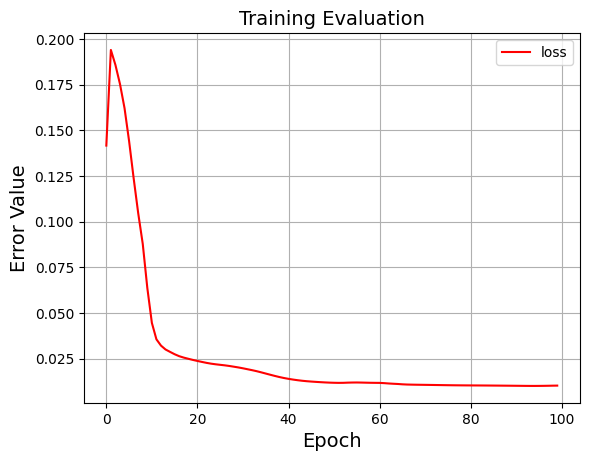

In [ ]:
plt.plot(losses, label='loss', color='red')
plt.title('Training Evaluation', fontsize=14)
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Error Value', fontsize=14)
plt.grid(True)
plt.legend()
plt.show()

## Results

In [ ]:
predictions = model.forward(x_test)
predictions = predictions.detach().cpu().numpy()

In [ ]:
for i in range(len(y_test)):
    if y_test[i] == 0:
        y_test[i] = -1
        
y_test

In [ ]:
def reverse_ohe(preds):
    ohe = []
    
    for i in preds:
        if i > 0.5:
            ohe.append([1])
        else:
            ohe.append([-1])
        
    return ohe

preds = reverse_ohe(predictions)
preds = np.array(preds)
preds.shape

(1418, 2)

In [ ]:
print('Accuracy: {}'.format(accuracy_score(preds, y_test)))

Accuracy: 0.8533145275035261


In [ ]:
print(classification_report(preds, y_test))

              precision    recall  f1-score   support

           0       1.00      0.32      0.49       307
           1       0.84      1.00      0.91      1111

   micro avg       0.85      0.85      0.85      1418
   macro avg       0.92      0.66      0.70      1418
weighted avg       0.88      0.85      0.82      1418
 samples avg       0.85      0.85      0.85      1418

